En este caso se han realizado las siguientes modificaciones:
1. Arquitectura: Se ha usado Alexnet para comparar su funcionamiento con squeezenet
2. No se ha modificado el tamaño de las imagenes
3. Se ha usado lr_find para ver que learning rate nos conviene

In [1]:
import os
import fastai
import matplotlib.pyplot as plt
import numpy as np
from fastai.vision.all import *
import torch
import skimage
from PIL import Image
import gc


In [2]:
path = Path('/home/yani/Pruebas TFG/DatasetConIncorrectas/Tipo2Oversampling/Completo')
dls = ImageDataLoaders.from_folder(path, train='train', valid='valid', bs=9, seed=43)

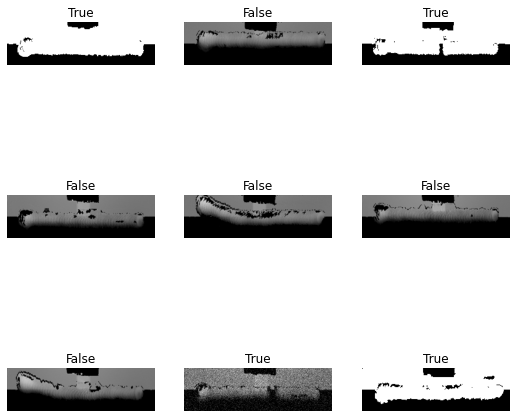

In [3]:
dls.show_batch()

In [4]:
precision = Precision()
f1 = F1Score()

In [6]:
learn = Learner(dls, alexnet(pretrained = True), opt_func = SGD,
              metrics=[accuracy,precision,f1])

SuggestedLRs(lr_min=0.0013182567432522773, lr_steep=0.0005754399462603033)

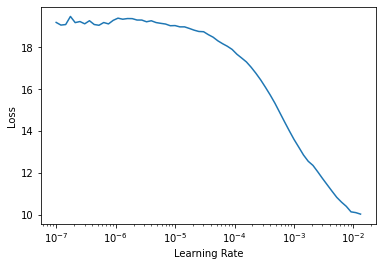

In [7]:
learn.lr_find()

In [8]:
learn.fit(4, lr=0.001)

epoch,train_loss,valid_loss,accuracy,precision_score,f1_score,time
0,0.351745,0.296439,0.865468,0.921053,0.272374,00:15
1,0.244465,0.253541,0.910072,0.670290,0.747475,00:14
2,0.162918,0.161781,0.933813,0.880240,0.761658,00:14
3,0.128058,0.157127,0.938129,0.754789,0.820833,00:14


En este caso probamos con un learning rate que parece mas adecuado porque la celda anterior contenía un learning rate que parecia adecuado para otra gráfica del learning rate que se habia obtenido.

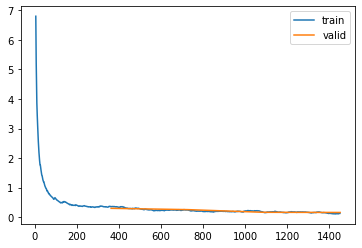

In [9]:
learn.recorder.plot_loss()

In [10]:
learn.freeze()

In [11]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,precision_score,f1_score,time
0,0.184739,0.141797,0.936691,0.922581,0.764706,00:14


epoch,train_loss,valid_loss,accuracy,precision_score,f1_score,time
0,0.091344,0.105320,0.963309,0.868421,0.885906,00:14
1,0.072286,0.094672,0.966906,0.881057,0.896861,00:14


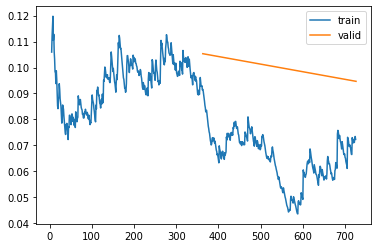

In [12]:
learn.recorder.plot_loss()

In [13]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,precision_score,f1_score,time
0,0.123436,0.160311,0.946043,0.783465,0.841438,00:14


epoch,train_loss,valid_loss,accuracy,precision_score,f1_score,time
0,0.054766,0.084473,0.969784,0.889868,0.905830,00:15
1,0.034284,0.085034,0.972662,0.898678,0.914798,00:15


In [14]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,precision_score,f1_score,time
0,0.071117,0.087176,0.968345,0.903226,0.899083,00:16


epoch,train_loss,valid_loss,accuracy,precision_score,f1_score,time
0,0.051779,0.090943,0.964029,0.836653,0.893617,00:15
1,0.030898,0.086115,0.970504,0.893805,0.907865,00:14
2,0.030625,0.064118,0.976259,0.930556,0.924138,00:15
3,0.023718,0.066999,0.976259,0.915179,0.925508,00:15
4,0.019246,0.072870,0.973381,0.899123,0.917226,00:14


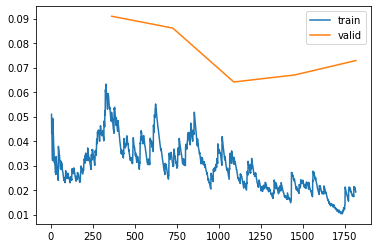

In [15]:
learn.recorder.plot_loss()

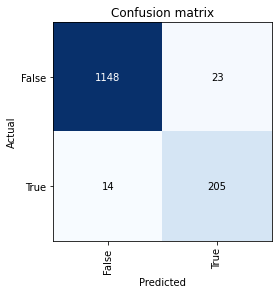

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [10]:
learn.summary()

AlexNet (Input shape: 9)
Layer (type)         Output Shape         Param #    Trainable 
                     9 x 64 x 16 x 59    
Conv2d                                    23296      True      
ReLU                                                           
MaxPool2d                                                      
____________________________________________________________________________
                     9 x 192 x 7 x 29    
Conv2d                                    307392     True      
ReLU                                                           
MaxPool2d                                                      
____________________________________________________________________________
                     9 x 384 x 3 x 14    
Conv2d                                    663936     True      
ReLU                                                           
____________________________________________________________________________
                     9 x 256 x 3 x 14    


En la celda anterior se pueda observar que el numero de parametros que Alexnet usa (en la ejecución en la que se ha escrito este comentario 61,100,840) realmente es mucho mayor que en el caso de squezeenet.